### Importing relevant Libraries.

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import json
import re
import pandas as pd
import nltk;
from nltk.stem import PorterStemmer
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer;
from nltk.tokenize import word_tokenize;
from nltk.tokenize import RegexpTokenizer;
from nltk.corpus import stopwords;
from nltk.stem import WordNetLemmatizer;
nltk.download('wordnet');
from nltk import bigrams, trigrams, FreqDist;
nltk.download('stopwords');
nltk.download('averaged_perceptron_tagger');
nltk.download('punkt');
from nltk.util import bigrams, trigrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter;
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image, display
# !pip install wordcloud;
from scipy import stats
import statistics
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gzip
from plotly.subplots import make_subplots

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Preprocessing

Preprocessing involves transforming raw data into a format suitable for analysis amd modelling which include transforming and structuring data to enhance its quality and utility, this will help in unlocking insights and building accurate and robust predictive models.

This code parses and analyzes data from a compressed JSON file containing beauty-related questions and answers, extracting relevant columns such as question type, question text, and top answers, and then displaying them.

In [2]:
#Parsing and Analyzing Data from a Compressed JSON File
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
        
def getDF(path):
    data = list(parse(path)) 
    intent_df = pd.json_normalize(data, 'questions', ['asin'])
    return intent_df

intent_df = getDF('QA_Beauty.json.gz')

# Keep only relevant columns
intent_df = intent_df[['questionType', 'questionText', 'answers']]

# Add column with top answer text
intent_df['top_answer'] = intent_df['answers'].apply(lambda x: max(x, key=lambda y: float(y.get('answerScore', 0))).get('answerText', ''))

# Display columns of interest
print(intent_df[['questionType', 'questionText', 'top_answer']])

      questionType                                       questionText  \
0       open-ended  May I request for a manual instruction on this...   
1       open-ended  Having problems with the heater melting the wa...   
2           yes/no  How much wax (in pounds, for instance) does it...   
3       open-ended      How to know the expired date of this product?   
4       open-ended  I am not in the sun as I work inside. I am new...   
...            ...                                                ...   
32931       yes/no              is Argan Oil Pure 100% good for Skin?   
32932       yes/no  I find myself with rough cuticles right around...   
32933       yes/no                        is it good for nail beauty?   
32934   open-ended      how can i use it for Topical Use on Dry Hair?   
32935   open-ended    how can i use it for Deep Conditioning Session?   

                                              top_answer  
0      Homedics has a complete list of instruction ma...  
1    

This code effectively aggregates questions and answers into a structured format and writes them to a JSON file for further processing
The code aggregates questions and corresponding answers into a list of dictionaries under a generic tag named `"General Inquiry"`.
The data is converted to a JSON-formatted string using the `json.dumps()` function, with indentation for better readability.
The JSON-formatted string is written to a file named `'intents_data.json'`.


In [3]:
# Aggregate questions and answers into a list of dictionaries under a generic tag
intent_data = {
    "tag": "General Inquiry",
    "questions": intent_df['questionText'].tolist(),
    "responses": intent_df['top_answer'].tolist()
}

# Wrap the single tag data in a list to match the desired format
intent_json = [intent_data]

# Convert to JSON string
intent_json_str = json.dumps(intent_json, indent=4)

# Output the JSON string to a file
with open('intents_data.json', 'w') as f:
    f.write(intent_json_str)

The code below parses intent data from a JSON file, categorizes questions based on specific topics such as personal care, health and safety, electronics, and more, and then organizes them into a structured format with corresponding tags, questions, and responses.

In [4]:
#Intent Data Processing from JSON File
with open('intent_data.json') as f:
    data = json.load(f)
    
new_data = []
tags = set()

for item in data:
    questions = item['questions']
    
    personal_care_questions = [q for q in questions if re.search(r'\b(skin|sunblock|nail polish|beauty|hair)\b', q, re.I)]
    health_questions = [q for q in questions if re.search(r'\b(allergies|irritation|hair loss|cancer|chemo|callus|ingredients? safety)\b', q, re.I)]
    electronics_questions = [q for q in questions if re.search(r'\b(electrical cords?|batteries?|voltage|compatibility)\b', q, re.I)]
    shipping_questions = [q for q in questions if re.search(r'\b(shipping|packaging|box|sealed|new)\b', q, re.I)]
    authenticity_questions = [q for q in questions if re.search(r'\b(authenticity|counterfeit|compare|original)\b', q, re.I)]
    fragrance_questions = [q for q in questions if re.search(r'\b(scent|fragrance|lasting|similar)\b', q, re.I)] 
    instructions_questions = [q for q in questions if re.search(r'\b(use|usage|instruction|direction|application|method|often)\b', q, re.I)]
    ingredients_questions = [q for q in questions if re.search(r'\b(zinc|titanium|glycolic acid|lactic acid|formaldehyde|urea|BHT|alcohol)\b', q, re.I)]
    comparison_questions = [q for q in questions if re.search(r'\b(compare|version|size|price)\b', q, re.I)]
    international_questions = [q for q in questions if re.search(r'\b(international|country|region)\b', q, re.I)]
    accessories_questions = [q for q in questions if re.search(r'\b(attachment|nozzle|cord|accessories)\b', q, re.I)]
    warranty_questions = [q for q in questions if re.search(r'\b(warranty|return|refund|support)\b', q, re.I)]
    
    # Tag assignment logic
if personal_care_questions: 
    tags.add('Personal Care')
    new_item = {'tag': 'Personal Care', 'questions': personal_care_questions, 'responses': item['responses']}
    new_data.append(new_item)

if health_questions:
    tags.add('Health and Safety') 
    new_item = {'tag': 'Health and Safety', 'questions': health_questions, 'responses': item['responses']}
    new_data.append(new_item)

if electronics_questions:
    tags.add('Electronics')
    new_item = {'tag': 'Electronics', 'questions': electronics_questions, 'responses': item['responses']}
    new_data.append(new_item)
    
if shipping_questions:
    tags.add('Shipping and Packaging')
    new_item = {'tag': 'Shipping and Packaging', 'questions': shipping_questions, 'responses': item['responses']}
    new_data.append(new_item)

if authenticity_questions:
    tags.add('Product Authenticity')
    new_item = {'tag': 'Product Authenticity', 'questions': authenticity_questions , 'responses': item['responses']}
    new_data.append(new_item)
    
if fragrance_questions:
    tags.add('Fragrance')
    new_item = {'tag': 'Fragrance', 'questions': fragrance_questions, 'responses': item['responses']}
    new_data.append(new_item)

if instructions_questions:
    tags.add('Usage Instructions')
    new_item = {'tag': 'Usage Instructions', 'questions': instructions_questions, 'responses': item['responses']}
    new_data.append(new_item)   

if ingredients_questions:
    tags.add('Ingredient Specific Questions')
    new_item = {'tag': 'Ingredient Specific Questions', 'questions': ingredients_questions, 'responses': item['responses']}
    new_data.append(new_item)

if comparison_questions:
    tags.add('Product Comparison')
    new_item = {'tag': 'Product Comparison', 'questions': comparison_questions, 'responses': item['responses']}
    new_data.append(new_item)

if international_questions:
    tags.add('International Shipping')
    new_item = {'tag': 'International Shipping', 'questions': international_questions, 'responses': item['responses']}
    new_data.append(new_item)  

if accessories_questions:
    tags.add('Accessories and Attachments')
    new_item = {'tag': 'Accessories and Attachments', 'questions': accessories_questions, 'responses': item['responses']}
    new_data.append(new_item)

if warranty_questions:
    tags.add('Warranty and Customer Support')
    new_item = {'tag': 'Warranty and Customer Support', 'questions': warranty_questions, 'responses': item['responses']}
    new_data.append(new_item)

if not personal_care_questions and not health_questions and not electronics_questions and not shipping_questions and not authenticity_questions and not fragrance_questions and not instructions_questions and not ingredients_questions and not comparison_questions and not international_questions and not accessories_questions and not warranty_questions:
    tags.add('General Inquiries')
    new_item = {'tag': 'General Inquiries', 'questions': questions, 'responses': item['responses']}
    new_data.append(new_item)
    
print(tags)
# print(new_data)

{'Product Comparison', 'Product Authenticity', 'Personal Care', 'Warranty and Customer Support', 'Fragrance', 'Ingredient Specific Questions', 'Usage Instructions', 'International Shipping', 'Shipping and Packaging', 'Accessories and Attachments', 'Electronics', 'Health and Safety'}


This code wraps the processed intent data into a list, converts it into a JSON string with indentation, and writes it to an output file named `'tagged_intent_data.json'`.

In [5]:
# Wrap new_data in a list 
output_data = [new_data] 

# Convert to JSON string
output_json = json.dumps(output_data, indent=4)

# Write to output file
with open('tagged_intent_data.json', 'w') as f:
    f.write(output_json)

#print(output_json)

## Loading Categorized Intent Data from JSON File
The code below reads categorized intent data from a JSON file named `'tagged_intent_data.json'`. It opens the file in read mode (`'r'`) using the `open()` function and loads the data into the variable `intents` using the `json.load()` function.

In [6]:
# loading the data
with open('tagged_intent_data.json', 'r') as file:
    intents = json.load(file)

## Tokenizing
The function `pair_questions_response` pairs questions with their corresponding responses from a list of dictionaries, assuming each sublist contains dictionaries with `'tag'`, `'questions'`, and `'responses'` keys, and returns a list of dictionaries with `'tag'`, `'question'`, and `'response'` keys.
- `'tag'` represents the category of the product i.e personal care, electrical etc
- `'question'` represents the question statement
- `'response'` represents the answer statement to the given question

After that it was then cleaned, normalized and tokenized


In [7]:
#pairing questions with responses
def pair_questions_responses(data):
    paired_data = []
    for sublist in data:  # If data is a list of lists
        for item in sublist:  # Assuming each sublist contains dictionaries
            tag = item.get('tag', [])
            questions = item.get('questions', [])
            responses = item.get('responses', [])
            
            for question, response in zip(questions, responses):
                paired_data.append({'tag': tag, 'question': question, 'response': response})
    
    return paired_data


In [8]:
# Use the function to pair questions and responses
paired_data = pair_questions_responses(intents)

In [9]:
df = pd.DataFrame(paired_data)
df.head(20)



,tag,question,response
0,Personal Care,can i put this on a toddler skin?,Homedics has a complete list of instruction ma...
1,Personal Care,Does VANICREAM Mositurizing Skin Cream contain...,I leave the unit on all the time so it is alwa...
2,Personal Care,Does it work for UV gel nail polish? It came u...,"It came with the proper amount of wax, but thi..."
3,Personal Care,Does your skin gets darker before it peels?,The expiration date is on the bottom of the pl...
4,Personal Care,"Can this be used on neck, chest and hands too ...",This product is awesome. I dont spend a lot of...
5,Personal Care,Will this help lighten/fade any acne scars? Do...,You could put it on a toddler's skin.. but not...
6,Personal Care,"It says for ""mature"" skin, I'm not sure what a...",Yes
7,Personal Care,Do you have hair fiber?,It is not visible once applied. I have been u...
8,Personal Care,"What color for Asian eyes? Hi, I usually don't...",Doesn't have one on the bottle.
9,Personal Care,Are 6 large rollers typically enough for an av...,I think so. The one for sensitive skin has zin...


In [10]:
# Adjusted list comprehension for nested structure
normalized_questions = [question.lower() for sublist in intents for item in sublist for question in item['questions']]


In [11]:
# Removing punctuation and special characters
cleaned_questions = [re.sub(r'[^\w\s]', '', question) for question in normalized_questions]
print("Cleaned Questions (Sample):", cleaned_questions[:5])

Cleaned Questions (Sample): ['can i put this on a toddler skin', 'does vanicream mositurizing skin cream contain urea and what percentage', 'does it work for uv gel nail polish it came up in that search', 'does your skin gets darker before it peels', 'can this be used on neck chest and hands too or am i better off using a lower 5 solution for aging skin on those areas']


In [12]:
# Tokenization: Break text into words
tokenized_questions = [question.split() for question in cleaned_questions]
# Display the first few tokenized questions
print("Tokenized Questions (Sample):", tokenized_questions[:5])

Tokenized Questions (Sample): [['can', 'i', 'put', 'this', 'on', 'a', 'toddler', 'skin'], ['does', 'vanicream', 'mositurizing', 'skin', 'cream', 'contain', 'urea', 'and', 'what', 'percentage'], ['does', 'it', 'work', 'for', 'uv', 'gel', 'nail', 'polish', 'it', 'came', 'up', 'in', 'that', 'search'], ['does', 'your', 'skin', 'gets', 'darker', 'before', 'it', 'peels'], ['can', 'this', 'be', 'used', 'on', 'neck', 'chest', 'and', 'hands', 'too', 'or', 'am', 'i', 'better', 'off', 'using', 'a', 'lower', '5', 'solution', 'for', 'aging', 'skin', 'on', 'those', 'areas']]


In [13]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in question if word not in stop_words] for question in tokenized_questions]
# Display the first few sets of filtered words
print("Filtered Words (Sample):", filtered_words[:5])




Filtered Words (Sample): [['put', 'toddler', 'skin'], ['vanicream', 'mositurizing', 'skin', 'cream', 'contain', 'urea', 'percentage'], ['work', 'uv', 'gel', 'nail', 'polish', 'came', 'search'], ['skin', 'gets', 'darker', 'peels'], ['used', 'neck', 'chest', 'hands', 'better', 'using', 'lower', '5', 'solution', 'aging', 'skin', 'areas']]


# Lemmatizing Words using NLTK
The code below utilizes the `WordNetLemmatizer` from the NLTK library to lemmatize words in a list of filtered words, and then prints a sample of the lemmatized words.


In [14]:
lemmatizer = WordNetLemmatizer() 
lemmatized_words = [[lemmatizer.lemmatize(word) for word in question] for question in filtered_words]

print("Lemmatized Words (Sample):", lemmatized_words[:5])

Lemmatized Words (Sample): [['put', 'toddler', 'skin'], ['vanicream', 'mositurizing', 'skin', 'cream', 'contain', 'urea', 'percentage'], ['work', 'uv', 'gel', 'nail', 'polish', 'came', 'search'], ['skin', 'get', 'darker', 'peel'], ['used', 'neck', 'chest', 'hand', 'better', 'using', 'lower', '5', 'solution', 'aging', 'skin', 'area']]


## Computing Statistics on Intent Data
The code computes the number of questions for each intent and stores it in a dictionary named `intent_counts`, where the intent tag is the key and the number of questions is the value.
- Mean Questions per Intent: Calculates the mean number of questions per intent using the `mean()` function from the statistics module.
- Median Questions per Intent: Calculates the median number of questions per intent using the `median()` function from the statistics module.
- Total Intents: Computes the total number of unique intents.

Find Intent(s) with the Fewest Questions:
- Determines the minimum number of questions across all intents.
- Identifies the intent(s) with the fewest questions based on the minimum count.

The code prints the calculated statistics for analysis            

In [15]:

# Adjusting to the nested list structure of intents
flat_intents = [item for sublist in intents for item in sublist]  # Flatten the list of lists to a simple list of dictionaries

# Compute statistics
intent_counts = {item['tag']: len(item['questions']) for item in flat_intents}

# Calculate additional statistics
mean_questions_per_intent = statistics.mean(intent_counts.values())
median_questions_per_intent = statistics.median(intent_counts.values())
total_intents = len(intent_counts)

# Find the intent(s) with the fewest questions
min_questions_count = min(intent_counts.values())
intents_with_fewest_questions = [intent for intent, count in intent_counts.items() if count == min_questions_count]

# Print the calculated statistics
print(f"Total Intents: {total_intents}")
print(f"Mean Questions per Intent: {mean_questions_per_intent:.2f}")
print(f"Median Questions per Intent: {median_questions_per_intent}")
print(f"Intent(s) with Fewest Questions ({min_questions_count} questions): {', '.join(intents_with_fewest_questions)}")


Total Intents: 12
Mean Questions per Intent: 1151.92
Median Questions per Intent: 475.0
Intent(s) with Fewest Questions (75 questions): Health and Safety


The output above reveals key statistics about the distribution of questions among different intents in a dataset. There are a total of 12 different intents covered. On average, each intent has about 1152 questions, with the middle value (median) being 475 questions per intent. Interestingly, the category labeled "Health and Safety" has the fewest questions, specifically 75. This information provides insights into the dataset's composition, indicating which intents receive more or less attention.

## Calculating Statistics for Question and Response Lengths
The code calculates various statistics for question and response lengths based on the flattened list of intents (`flat_intents`).
The code flattens the list of lists (`intents`) into a simple list of dictionaries, storing it in the `flat_intents` variable.

The code:
- Computes the length of each question (in terms of the number of words) for all intents and stores them in the question_lengths list.
- Computes the length of each response (in terms of the number of words) for all intents and stores them in the response_lengths list.
- It calculates the mean, median, and standard deviation of the question lengths using the mean(), median(), and stdev() functions from the statistics module.
- It calculates the mean, median, and standard deviation of the response lengths using similar functions.
The code prints out the calculated statistics for question lengths and response lengths.

In [16]:

# Flatten the list of lists to a simple list of dictionaries
flat_intents = [item for sublist in intents for item in sublist]

# Calculate the lengths of questions and responses for all intents
question_lengths = [len(question.split()) for item in flat_intents for question in item['questions']]
response_lengths = [len(response.split()) for item in flat_intents for responses in item['responses'] for response in responses]

# Calculate the mean, median, and standard deviation for question lengths
question_mean = statistics.mean(question_lengths)
question_median = statistics.median(question_lengths)
question_std_dev = statistics.stdev(question_lengths)

# Calculate the mean, median, and standard deviation for response lengths
response_mean = statistics.mean(response_lengths)
response_median = statistics.median(response_lengths)
response_std_dev = statistics.stdev(response_lengths)

# Print the statistics
print("Statistics for Question Lengths:")
print(f"Mean: {question_mean}")
print(f"Median: {question_median}")
print(f"Standard Deviation: {question_std_dev}")
print("\n")
print("Statistics for Response Lengths:")
print(f"Mean: {response_mean}")
print(f"Median: {response_median}")
print(f"Standard Deviation: {response_std_dev}")


Statistics for Question Lengths:
Mean: 18.869709903783548
Median: 14
Standard Deviation: 24.957750941256222


Statistics for Response Lengths:
Mean: 0.8106897685956129
Median: 1.0
Standard Deviation: 0.3917548590282223


The output above provides statistical information about the lengths of questions and responses in the dataset. For question lengths, the mean (average) length is approximately 18.87 words, with a median of 14 words. The standard deviation, which indicates the variability or spread of the data, is approximately 24.96 words. Similarly, for response lengths, the mean is about 0.81 words, the median is 1 word, and the standard deviation is around 0.39 words. These statistics offer insights into the typical lengths of questions and responses in the dataset, along with their variability.

## Visualizing Question and Response Lengths using Plotly Express


This code calculates the lengths of questions and responses for all intents by iterating through each intent, splitting the questions and responses, and computing the lengths of the resulting lists of words.

In [17]:

# Assuming flat_intents has been defined as shown in previous steps:
flat_intents = [item for sublist in intents for item in sublist]

# Calculate the lengths of questions and responses for all intents
question_lengths = [len(question.split()) for item in flat_intents for question in item['questions']]
response_lengths = [len(response.split()) for item in flat_intents for responses in item['responses'] for response in responses]


In [25]:
pip install -U plotly kaleido

The visualization code below generates a histogram using Plotly Express to visualize the distribution of word counts in both questions and responses. It overlays the histograms for questions and responses, sets the chart title, axis labels, legend title, width, and height, and restricts the x-axis range from 0 to 500. Finally, it displays the histogram and optionally saves it as a static image. Additionally, it loads and displays the saved image using Matplotlib.

In [ ]:

# Create a histogram using Plotly Express
fig = px.histogram(
    x=question_lengths + response_lengths, 
    color=["Questions"] * len(question_lengths) + ["Responses"] * len(response_lengths),
    barmode='overlay',
    opacity=0.6
)

# Update layout for the chart
fig.update_layout(
    title="Question and Response Lengths",
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    legend_title="Type",
    width=800,  # Set the width of the figure
    height=600   # Set the height of the figure
)

# Update x-axis range to be from 0 to 500
fig.update_xaxes(range=[0, 500])

# Note: Adjust the path as needed for your environment
# For Jupyter Notebooks or IPython environments to display directly
fig.show()

# # Optionally, to save and display the image as a static file:
# # Ensure kaleido is installed for image export
# # pip install -U kaleido

# Define path for saving the image, considering the environment's file system
image_path = "/mnt/data/question_response_lengths_histogram.png"
fig.write_image(image_path)

# # Display the image directly in the notebook
# # Adjust the path if necessary based on your environment
# display(Image(filename=image_path))

# ###

# Load the image
img = mpimg.imread('/mnt/data/question_response_lengths_histogram.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


The code below calculates the lengths of questions and responses for all intents, creates a histogram using Plotly Express to visualize the distribution of word counts in questions and responses, overlays the histograms for questions and responses, sets the chart title, axis labels, and legend title, restricts the x-axis range from 0 to 500, saves the histogram as a PNG image named "question_response_lengths_histogram.png", and displays the image directly in the notebook.

In [19]:

# Displaying the length of questions and responses
question_lengths = [len(question.split()) for intent in intents for question in intent['questions']]
response_lengths = [len(response.split()) for intent in intents for response in intent.get('responses', [])]

# Create a histogram using Plotly Express
fig = px.histogram(
    x=question_lengths + response_lengths, 
    color=["Questions"] * len(question_lengths) + ["Responses"] * len(response_lengths),
    barmode='overlay',
    opacity=0.6
)

# Update layout for the chart
fig.update_layout(
    title="Question and Response Lengths",
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    legend_title="Type"
)

# Update x-axis range to be from 0 to 500
fig.update_xaxes(range=[0, 500])

# Save the figure as an image (PNG, for example)
image_path = "question_response_lengths_histogram.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))


TypeError: list indices must be integers or slices, not str

The graph is a violin plot showing the distribution of word counts in questions and responses. Responses exhibit a wider and more varied distribution, indicating a broader range of word counts. There is a significant concentration around 500-1000 words, but also several responses extending up to 3500 words. The width of the plot for responses is broader at multiple points along the y-axis, highlighting that there are various common lengths for responses.

## Word Frequency
Refers to the number of times a word appears in a given corpus or text document

In the cell below we calculate the frequency of words in a list of lemmatized words, and then prints the twenty most common words along with their frequencies.

In [20]:

# Calculating word frequency
all_words = [word for question in lemmatized_words for word in question]  # Flatten the list
word_freq = Counter(all_words)

# Display the most common words
print("Most Common Words:", word_freq.most_common(20))

Most Common Words: [('hair', 6368), ('use', 4951), ('product', 2509), ('color', 1389), ('skin', 1370), ('would', 1179), ('work', 1091), ('one', 1084), ('size', 1029), ('like', 932), ('original', 905), ('used', 734), ('box', 723), ('come', 711), ('long', 699), ('need', 697), ('want', 692), ('im', 689), ('dry', 654), ('get', 631)]


'Hair' is the most frequent word since we are working with a beauty ecommerce dataset.

Below we generate a bar chart using Plotly Express to visualize the twenty most common words in a list along with their frequencies, and then save the chart as an image named `"most_common_words_bar_chart.png"` and displays it in the notebook.

In [21]:
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=words,
    y=frequencies,
    title="Top 20 Most Common Words in Questions",
    labels={'x': 'Words', 'y': 'Frequency'},
    color_discrete_sequence=['skyblue']
)

# Update layout for the chart (adjusting size)
fig.update_layout(
    width=800,  # Set the width of the chart
    height=600,  # Set the height of the chart
)

# Save the figure as an image (PNG, for example)
image_path = "most_common_words_bar_chart.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))


SyntaxError: source code string cannot contain null bytes (<string>)

## Wordcloud for the most common words

Here we generate a word cloud visualization using the most frequent words from a list of lemmatized words and display it.

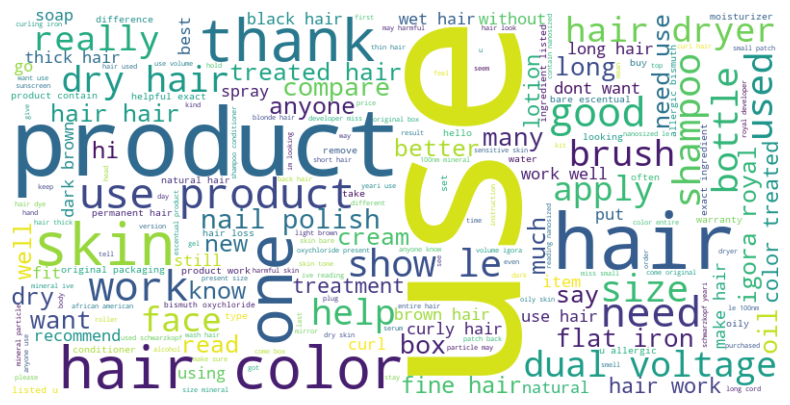

In [22]:
# Creating a word cloud for visualizing the most frequent words.
# Generate a word cloud
all_words_string = ' '.join([word for sublist in lemmatized_words for word in sublist])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_words_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Bi-grams and Tri-grams
Their function is to analyze sequential pairs and triplets of words, respectively, capturing contextual relationships and enhancing understanding of language patterns and structures.

The code below generates bigrams and trigrams from a list of words, capturing sequential pairs and triplets of words respectively, and then calculates the frequency distribution of these bigrams and trigrams.

In [23]:
# Create bi-grams and tri-grams
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Frequency distribution
bi_gram_freq = FreqDist(bi_grams)
tri_gram_freq = FreqDist(tri_grams)

The code cell below creates bar charts displaying the most common bi-grams and tri-grams, visualizing their frequencies in a dataset. The charts are generated using Plotly and arranged side by side in a subplot layout. Each chart represents the frequency distribution of the respective n-grams, with the x-axis showing the n-gram labels and the y-axis indicating their frequencies.

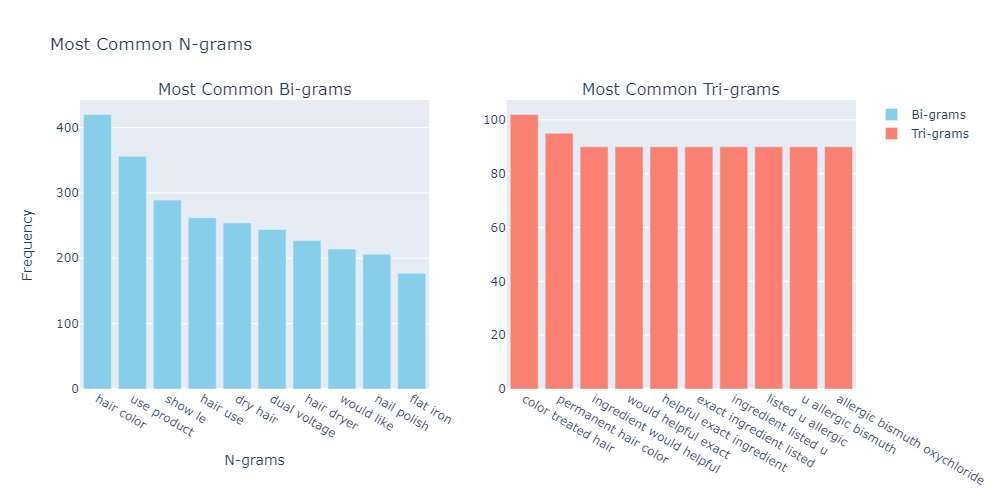

In [24]:

bi_gram_labels, bi_gram_counts = zip(*bi_gram_freq.most_common(10))
tri_gram_labels, tri_gram_counts = zip(*tri_gram_freq.most_common(10))
bi_gram_labels_str = [' '.join(gram) for gram in bi_gram_labels]
tri_gram_labels_str = [' '.join(gram) for gram in tri_gram_labels]

# Initialize subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Most Common Bi-grams", "Most Common Tri-grams"))

# Add bi-gram bar chart
fig.add_trace(
    go.Bar(x=bi_gram_labels_str, y=bi_gram_counts, name="Bi-grams"),
    row=1, col=1
)

# Add tri-gram bar chart
fig.add_trace(
    go.Bar(x=tri_gram_labels_str, y=tri_gram_counts, name="Tri-grams"),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Most Common N-grams",
    xaxis_title="N-grams",
    yaxis_title="Frequency",
    colorway=["skyblue", "salmon"], 
    width=1000,  # Set the width of the chart
    height=500,  # Set the height of the chart
)

# Save the figure as an image 
image_path = "most_common_ngrams_subplot.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))